In [1]:
import pandas as pd
import numpy as np

In [2]:
bycountrywaste = pd.read_csv('cei_pc031_page_linear.csv')

In [3]:
bycountrywaste

,DATAFLOW,LAST UPDATE,freq,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2013,325,s
1,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2014,425,s
2,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2015,491,s
3,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2016,452,e
4,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2017,436,e
...,...,...,...,...,...,...,...,...,...
768,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,XK,2017,229,NaN
769,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,XK,2018,226,NaN
770,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,XK,2019,252,NaN
771,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,XK,2020,255,NaN


In [4]:
#delete irrelevant columns for data analysis
bycountrywaste.drop("DATAFLOW", inplace=True, axis=1)
bycountrywaste.drop("LAST UPDATE", inplace=True, axis=1)
bycountrywaste.drop("freq", inplace=True, axis=1)
bycountrywaste.drop("wst_oper", inplace=True, axis=1)
bycountrywaste.drop("unit", inplace=True, axis=1)
bycountrywaste.drop("OBS_FLAG", inplace=True, axis=1)
bycountrywaste.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2013,325
1,AL,2014,425
2,AL,2015,491
3,AL,2016,452
4,AL,2017,436


In [5]:
bycountrywaste.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"municipal_waste_kg_per_capita"}, inplace=True)
bycountrywaste.head()

,region_id,year,municipal_waste_kg_per_capita
0,AL,2013,325
1,AL,2014,425
2,AL,2015,491
3,AL,2016,452
4,AL,2017,436


In [6]:
#add a new column and assign the country name to it
bycountrywaste["country_name"]=bycountrywaste.region_id.replace({"EU27_2020": "European Union - 27 countries (from 2020)","EU28": "European Union - 28 countries (2013-2020)",
"EA20": "Euro area – 20 countries (from 2023)",
"EA19": "Euro area - 19 countries (2015-2022)",
"BE": "Belgium",
"BG": "Bulgaria",
"CZ": "Czechia",
"DK": "Denmark",
"DE": "Germany (until 1990 former territory of the FRG)",
"EE": "Estonia",
"IE": "Ireland",
"EL": "Greece",
"ES": "Spain",
"FR": "France",
"HR": "Croatia",
"CY": "Cyprus",
"IT": "Italy",
"IS": "Iceland",
"LV": "Latvia",
"LT": "Lithuania",
"LU": "Luxembourg",
"HU": "Hungary",
"MT": "Malta",
"NL": "Netherlands",
"AT": "Austria",
"PL": "Poland",
"PT": "Portugal",
"RO": "Romania",
"SI": "Slovenia",
"SK": "Slovakia",
"FI": "Finland",
"SE": "Sweden",
"IS": "Iceland",
"LI": "Lichtenstein",
"NO": "Norway",
"CH": "Switzerland",
"UK": "United Kingdom",
"BA": "Bosnia and Herzegovina",
"ME": "Montenegro",
"MK": "North Macedonia",
"AL": "Albania",
"RS": "Serbia",
"TR": "Türkiye",
"XK": "Kosovo (under United Nations Security Council Resolution 1244/99)"
})

In [7]:
#number assigend values in "region_id" (ok)
bycountrywaste["region_id"].nunique()

39

In [8]:
#move column "country_name"
column_to_move = bycountrywaste.pop("country_name")
bycountrywaste.insert(0, "country_name", column_to_move)
bycountrywaste.head(5)

,country_name,region_id,year,municipal_waste_kg_per_capita
0,Albania,AL,2013,325
1,Albania,AL,2014,425
2,Albania,AL,2015,491
3,Albania,AL,2016,452
4,Albania,AL,2017,436


In [9]:
bycountrywastepivot = np.round(pd.pivot_table(bycountrywaste, values="municipal_waste_kg_per_capita", index=["country_name", "region_id"], columns="year", aggfunc=np.mean),2)
bycountrywastepivot.head()

,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,325.0,425.0,491.0,452.0,436.0,462.0,381.0,369.0,311.0
Austria,AT,580.0,576.0,608.0,607.0,574.0,575.0,597.0,597.0,600.0,590.0,...,579.0,578.0,565.0,560.0,564.0,570.0,579.0,588.0,834.0,NaN
Belgium,BE,471.0,467.0,482.0,465.0,485.0,482.0,485.0,493.0,480.0,467.0,...,445.0,436.0,425.0,412.0,419.0,411.0,409.0,416.0,729.0,759.0
Bosnia and Herzegovina,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.0,354.0,...,340.0,311.0,349.0,340.0,354.0,352.0,356.0,352.0,NaN,NaN
Bulgaria,BG,612.0,596.0,602.0,603.0,599.0,588.0,577.0,553.0,599.0,598.0,...,460.0,432.0,442.0,419.0,404.0,435.0,407.0,442.0,408.0,NaN


In [10]:
# this step is very important
# I decided to fill all missing values with the mean values. This way we have a full dataset for all countries and all years.
bycountrywastepivot = pd.pivot_table(bycountrywaste, values="municipal_waste_kg_per_capita", index=["country_name", "region_id"], columns="year", aggfunc=np.mean)
bycountrywastepivot = bycountrywastepivot.apply(lambda x: x.fillna(x.mean()), axis=1)
bycountrywastepivot = bycountrywastepivot.round(2)

# Overwrite the original dataframe with the modified one
bycountrywastepivot.head()

,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,...,405.78,325.0,425.0,491.0,452.0,436.0,462.0,381.0,369.00,311.00
Austria,AT,580.00,576.00,608.00,607.00,574.00,575.00,597.00,597.00,600.00,590.00,...,579.00,578.0,565.0,560.0,564.0,570.0,579.0,588.0,834.00,593.14
Belgium,BE,471.00,467.00,482.00,465.00,485.00,482.00,485.00,493.00,480.00,467.00,...,445.00,436.0,425.0,412.0,419.0,411.0,409.0,416.0,729.00,759.00
Bosnia and Herzegovina,BA,344.67,344.67,344.67,344.67,344.67,344.67,344.67,344.67,356.00,354.00,...,340.00,311.0,349.0,340.0,354.0,352.0,356.0,352.0,344.67,344.67
Bulgaria,BG,612.00,596.00,602.00,603.00,599.00,588.00,577.00,553.00,599.00,598.00,...,460.00,432.0,442.0,419.0,404.0,435.0,407.0,442.0,408.00,516.10


In [11]:
# Unpivot the pivoted DataFrame back to its original form
bycountrywaste = pd.melt(bycountrywastepivot.reset_index(), id_vars=['country_name', 'region_id'], var_name='year', value_name='municipal_waste_kg_per_capita')

# Round the municipal_waste_kg_per_capita column to two decimal places
bycountrywaste['municipal_waste_kg_per_capita'] = bycountrywaste['municipal_waste_kg_per_capita'].round(2)

# Display the resulting DataFrame
print(bycountrywaste)

               country_name region_id  year  municipal_waste_kg_per_capita
0                   Albania        AL  2000                         405.78
1                   Austria        AT  2000                         580.00
2                   Belgium        BE  2000                         471.00
3    Bosnia and Herzegovina        BA  2000                         344.67
4                  Bulgaria        BG  2000                         612.00
..                      ...       ...   ...                            ...
853                   Spain        ES  2021                         472.00
854                  Sweden        SE  2021                         418.00
855             Switzerland        CH  2021                         704.00
856                 Türkiye        TR  2021                         429.43
857          United Kingdom        UK  2021                         531.11

[858 rows x 4 columns]


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# for polynomial all data type shall be in "float"
print(bycountrywaste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   858 non-null    object 
 1   region_id                      858 non-null    object 
 2   year                           858 non-null    object 
 3   municipal_waste_kg_per_capita  858 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.9+ KB
None


In [14]:
#you can not convert directly to float
#Step 1: convert country_name and region_id to int64
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

bycountrywaste['country_name'] = le.fit_transform(bycountrywaste['country_name'])
bycountrywaste['region_id'] = le.fit_transform(bycountrywaste['region_id'])

print(bycountrywaste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   858 non-null    int32  
 1   region_id                      858 non-null    int32  
 2   year                           858 non-null    object 
 3   municipal_waste_kg_per_capita  858 non-null    float64
dtypes: float64(1), int32(2), object(1)
memory usage: 20.2+ KB
None


In [15]:
#Step 2: convert to float
bycountrywaste = bycountrywaste.astype(float)
print(bycountrywaste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   858 non-null    float64
 1   region_id                      858 non-null    float64
 2   year                           858 non-null    float64
 3   municipal_waste_kg_per_capita  858 non-null    float64
dtypes: float64(4)
memory usage: 26.9 KB
None


In [16]:
#this is the  LINEAR regression 

# create a new dataframe with missing values filled with country mean
bycountrywastepivot_filled = bycountrywastepivot.fillna(bycountrywastepivot.groupby(['country_name']).transform('mean'))

# create a new dataframe for predictions
prediction_bycountrywastepivot = pd.DataFrame(columns=bycountrywastepivot_filled.columns)

# iterate through each country and perform linear regression
for country in bycountrywastepivot_filled.index.levels[0]:
    # select data for the current country
    data = bycountrywastepivot_filled.loc[country].dropna(axis=1)
    
    # check if there is enough data for linear regression
    if data.shape[1] < 2:
        continue
        
    # create a linear regression model
    lr_model = LinearRegression()
    
    # fit the model to the data
    X = data.columns.values.reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    lr_model.fit(X, y)
    
    # make predictions for the next 4 years
    X_pred = np.array([2022, 2023, 2024, 2025,2026]).reshape(-1, 1)
    y_pred = lr_model.predict(X_pred).reshape(1, -1)
    
    # add the predictions to the prediction dataframe
    country_prediction = pd.DataFrame(y_pred, index=[country], columns=X_pred.flatten())
    prediction_bycountrywastepivot = pd.concat([prediction_bycountrywastepivot, country_prediction])

# round the predictions to 2 decimal places
prediction_bycountrywastepivot = np.round(prediction_bycountrywastepivot, 2)

# display the predictions
prediction_bycountrywastepivot.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,400.14,399.65,399.16,398.67,398.18
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,616.23,618.24,620.25,622.26,624.26
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,518.39,521.77,525.15,528.53,531.92
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,346.11,346.23,346.36,346.48,346.61
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,393.39,382.73,372.06,361.39,350.72


In [17]:
# Fitting Polynomial Regression to the dataset
#from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree=2)
#X_poly = poly_reg.fit_transform(X)
#pol_reg = LinearRegression()
#pol_reg.fit(X_poly, y)


#country_prediction = pd.DataFrame(y_pred, index=[country], columns=X_pred.flatten())
#prediction_bycountrywastepivot = pd.concat([prediction_bycountrywastepivot, country_prediction])

# round the predictions to 2 decimal places
#prediction_bycountrywastepivot = np.round(prediction_bycountrywastepivot, 2)

# display the predictions
#prediction_bycountrywastepivot.head()


#y_pred = pol_reg.predict(X_poly)


#predictions_df = pd.DataFrame({'X': X.flatten(), 'y_true': y.flatten(), 'y_pred': y_pred.flatten()})



In [18]:
#predictions_df


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import median_absolute_error

# create a new dataframe with missing values filled with country mean
bycountrywastepivot_filled = bycountrywastepivot.fillna(bycountrywastepivot.groupby(['country_name']).transform('mean'))

# create a new dataframe for predictions
prediction_bycountrywastepivot = pd.DataFrame()

# create a dictionary to store R-squared values for each country
r_squared_dict = {}
mse_dict = {}
rmse_dict = {}


# iterate through each country and perform polynomial regression
for country in bycountrywastepivot_filled.index.levels[0]:
    # select data for the current country
    data = bycountrywastepivot_filled.loc[country].dropna(axis=1)

    # check if there is enough data for polynomial regression
    if data.shape[1] < 3:
        continue

    # create a polynomial regression model
    X = data.columns.values.reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)

    # make predictions for the next 5 years
    X_pred = np.array([2022, 2023, 2024, 2025, 2026]).reshape(-1, 1)
    X_pred_poly = poly_reg.transform(X_pred)
    y_pred = pol_reg.predict(X_pred_poly).reshape(1, -1)

    # add the predictions to the prediction dataframe
    country_prediction = pd.DataFrame(y_pred, index=[country], columns=['2022', '2023', '2024', '2025', '2026'])
    prediction_bycountrywastepivot = pd.concat([prediction_bycountrywastepivot, country_prediction])

    # calculate R-squared value and store it in the dictionary
    y_pred_train = pol_reg.predict(X_poly)
    r_squared = r2_score(y, y_pred_train)
    r_squared_dict[country] = r_squared

    # calculate MSE and RMSE value and store it in the dictionary
    mse = mean_squared_error(y, y_pred_train)
    rmse = np.sqrt(mse)
    mse_dict[country] = mse
    rmse_dict[country] = rmse

# round the predictions to 2 decimal places
prediction_bycountrywastepivot = np.round(prediction_bycountrywastepivot, 2)

mse_dict = {k: round(v, 2) for k, v in mse_dict.items()}
rmse_dict = {k: round(v, 2) for k, v in rmse_dict.items()}

# display the predictions
prediction_bycountrywastepivot.head()



,2022,2023,2024,2025,2026
Albania,373.31,365.82,357.74,349.09,339.85
Austria,665.64,680.53,696.50,713.54,731.66
Belgium,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,351.26,352.72,354.30,356.00,357.80
Bulgaria,410.81,404.69,398.94,393.57,388.58


In [20]:
# R-squared values for each country:
# best possible score 1
for country, r_squared in r_squared_dict.items():
    print(f"R squared for {country}: {r_squared:.2f}")

R squared for Albania: 0.08
R squared for Austria: 0.18
R squared for Belgium: 0.32
R squared for Bosnia and Herzegovina: 0.05
R squared for Bulgaria: 0.75
R squared for Croatia: 0.50
R squared for Cyprus: 0.42
R squared for Czechia: 0.89
R squared for Denmark: 0.87
R squared for Estonia: 0.37
R squared for European Union - 27 countries (from 2020): 0.30
R squared for Finland: 0.76
R squared for France: 0.43
R squared for Germany (until 1990 former territory of the FRG): 0.36
R squared for Greece: 0.76
R squared for Hungary: 0.68
R squared for Iceland: 0.35
R squared for Ireland: 0.29
R squared for Italy: 0.40
R squared for Kosovo (under United Nations Security Council Resolution 1244/99): 0.19
R squared for Latvia: 0.82
R squared for Lithuania: 0.87
R squared for Luxembourg: 0.53
R squared for Malta: 0.52
R squared for Montenegro: 0.04
R squared for Netherlands: 0.84
R squared for North Macedonia: 0.79
R squared for Norway: 0.65
R squared for Poland: 0.32
R squared for Portugal: 0.31


In [21]:
#RMSE values: high RMSE  -> indicate inaccurate predictions

for country, rmse in rmse_dict.items():
    print(f"RMSE for {country}: {rmse:.2f}")

RMSE for Albania: 36.11
RMSE for Austria: 49.19
RMSE for Belgium: 72.52
RMSE for Bosnia and Herzegovina: 9.08
RMSE for Bulgaria: 39.45
RMSE for Croatia: 29.37
RMSE for Cyprus: 27.73
RMSE for Czechia: 31.06
RMSE for Denmark: 23.15
RMSE for Estonia: 38.87
RMSE for European Union - 27 countries (from 2020): 11.33
RMSE for Finland: 20.29
RMSE for France: 11.48
RMSE for Germany (until 1990 former territory of the FRG): 19.42
RMSE for Greece: 16.54
RMSE for Hungary: 19.34
RMSE for Iceland: 58.95
RMSE for Ireland: 54.54
RMSE for Italy: 18.82
RMSE for Kosovo (under United Nations Security Council Resolution 1244/99): 13.94
RMSE for Latvia: 22.57
RMSE for Lithuania: 12.89
RMSE for Luxembourg: 44.66
RMSE for Malta: 31.17
RMSE for Montenegro: 12.85
RMSE for Netherlands: 14.68
RMSE for North Macedonia: 12.61
RMSE for Norway: 81.22
RMSE for Poland: 21.49
RMSE for Portugal: 23.69
RMSE for Romania: 39.43
RMSE for Serbia: 40.40
RMSE for Slovakia: 19.21
RMSE for Slovenia: 44.84
RMSE for Spain: 17.78
RM

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold


#define the number of folds for cross-validation
k = 5

#define the k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True)

#define the polynomial degree
degree = 2

#define the polynomial regression model as a pipeline
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('lin_reg', LinearRegression())
])

#perform k-fold cross-validation on the polynomial regression model
cv_scores = cross_val_score(poly_reg, X, y, cv=kf, scoring='neg_mean_squared_error')

#calculate the root mean squared error (RMSE) for the cross-validation scores
cv_rmse = np.sqrt(-cv_scores)

#print the mean and standard deviation of the RMSE scores
print(f"Mean RMSE: {cv_rmse.mean():.2f}")
print(f"Standard deviation of RMSE: {cv_rmse.std():.2f}")

Mean RMSE: 30.21
Standard deviation of RMSE: 7.25


In [23]:
#drop if any NAN-Values
prediction_bycountrywastepivot = prediction_bycountrywastepivot.dropna(axis=1, how='all')
prediction_bycountrywastepivot.head()

,2022,2023,2024,2025,2026
Albania,373.31,365.82,357.74,349.09,339.85
Austria,665.64,680.53,696.50,713.54,731.66
Belgium,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,351.26,352.72,354.30,356.00,357.80
Bulgaria,410.81,404.69,398.94,393.57,388.58


In [24]:
#renames the index (1st column) to "country_name".
prediction_bycountrywastepivot = prediction_bycountrywastepivot.rename_axis("country_name", axis='index')
prediction_bycountrywastepivot.head()

,2022,2023,2024,2025,2026
country_name,,,,,
Albania,373.31,365.82,357.74,349.09,339.85
Austria,665.64,680.53,696.50,713.54,731.66
Belgium,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,351.26,352.72,354.30,356.00,357.80
Bulgaria,410.81,404.69,398.94,393.57,388.58


In [25]:
#merge original dataframe with the prediction dataframe
left = bycountrywastepivot
right = prediction_bycountrywastepivot
merged_data=pd.merge(left, right, how ='outer', on ='country_name')
merged_data.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
country_name,,,,,,,,,,,,,,,,,,,,,
Albania,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,...,436.0,462.0,381.0,369.00,311.00,373.31,365.82,357.74,349.09,339.85
Austria,580.00,576.00,608.00,607.00,574.00,575.00,597.00,597.00,600.00,590.00,...,570.0,579.0,588.0,834.00,593.14,665.64,680.53,696.50,713.54,731.66
Belgium,471.00,467.00,482.00,465.00,485.00,482.00,485.00,493.00,480.00,467.00,...,411.0,409.0,416.0,729.00,759.00,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,344.67,344.67,344.67,344.67,344.67,344.67,344.67,344.67,356.00,354.00,...,352.0,356.0,352.0,344.67,344.67,351.26,352.72,354.30,356.00,357.80
Bulgaria,612.00,596.00,602.00,603.00,599.00,588.00,577.00,553.00,599.00,598.00,...,435.0,407.0,442.0,408.00,516.10,410.81,404.69,398.94,393.57,388.58


In [26]:
#re-chek if there are NAN values in the final dataframe
if merged_data.isna().any().any():
    print("There are NaN values in the final DataFrame.")
else:
    print("There are no NaN values in the final DataFrame.")

There are no NaN values in the final DataFrame.


In [27]:
#any zero values?
if (merged_data == 0).any().any():
    print("There are values equal to zero in the final DataFrame.")
else:
    print("There are no values equal to zero in the final DataFrame.")

There are no values equal to zero in the final DataFrame.


In [28]:
merged_data.columns = merged_data.columns.set_names('Years')

In [29]:
missing_values = merged_data.isnull().sum().sum()
if missing_values > 0:
    print(f"There are {missing_values} missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


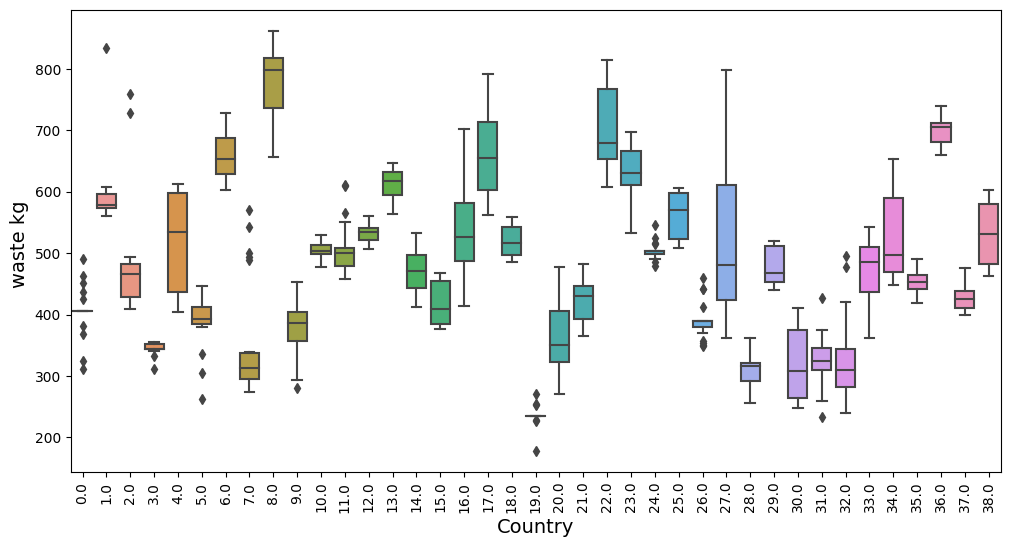

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#BOXPLOTS for each country
# set the figure size for boxplots
fig, ax = plt.subplots(figsize=(12, 6))
# create a boxplot for each country
sns.boxplot(data=bycountrywaste, x='country_name', y='municipal_waste_kg_per_capita', ax=ax)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('waste kg ', fontsize=14)

# rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


In [31]:
merged_data.columns

Index([  2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016,   2017,
         2018,   2019,   2020,   2021, '2022', '2023', '2024', '2025', '2026'],
      dtype='object', name='Years')

In [32]:
merged_data.dtypes

Years
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
2024    float64
2025    float64
2026    float64
dtype: object

In [33]:
#create a csv with the merged data to visualize


merged_data.to_csv("mapgraph.csv")

In [34]:
merged_data

Years,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
country_name,,,,,,,,,,,,,,,,,,,,,
Albania,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,...,436.00,462.0,381.00,369.00,311.00,373.31,365.82,357.74,349.09,339.85
Austria,580.00,576.00,608.00,607.00,574.00,575.00,597.00,597.00,600.00,590.00,...,570.00,579.0,588.00,834.00,593.14,665.64,680.53,696.50,713.54,731.66
Belgium,471.00,467.00,482.00,465.00,485.00,482.00,485.00,493.00,480.00,467.00,...,411.00,409.0,416.00,729.00,759.00,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,344.67,344.67,344.67,344.67,344.67,344.67,344.67,344.67,356.00,354.00,...,352.00,356.0,352.00,344.67,344.67,351.26,352.72,354.30,356.00,357.80
Bulgaria,612.00,596.00,602.00,603.00,599.00,588.00,577.00,553.00,599.00,598.00,...,435.00,407.0,442.00,408.00,516.10,410.81,404.69,398.94,393.57,388.58
Croatia,262.00,389.63,389.63,389.63,304.00,336.00,384.00,399.00,415.00,405.00,...,416.00,432.0,445.00,418.00,446.00,434.56,437.16,439.60,441.87,443.98
Cyprus,628.00,650.00,655.00,670.00,684.00,688.00,695.00,704.00,729.00,729.00,...,625.00,646.0,648.00,609.00,633.00,586.32,572.62,557.99,542.44,525.97
Czechia,335.00,274.00,279.00,280.00,279.00,289.00,297.00,294.00,306.00,317.00,...,489.00,494.0,500.00,543.00,570.00,608.09,651.45,697.45,746.09,797.39
Denmark,664.00,657.00,664.00,671.00,695.00,736.00,740.00,790.00,830.00,762.00,...,820.00,814.0,844.00,814.00,786.00,793.65,782.83,770.43,756.44,740.88


In [35]:
merged_data=merged_data.drop('European Union - 27 countries (from 2020)')


In [36]:
#change the name to Germany and Kosovo to match with the map
merged_data = merged_data.rename(index={'Kosovo (under United Nations Security Council Resolution 1244/99)': 'Kosovo', 'Germany (until 1990 former territory of the FRG)': 'Germany'})

In [37]:
merged_data

Years,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
country_name,,,,,,,,,,,,,,,,,,,,,
Albania,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,...,436.00,462.0,381.00,369.00,311.00,373.31,365.82,357.74,349.09,339.85
Austria,580.00,576.00,608.00,607.00,574.00,575.00,597.00,597.00,600.00,590.00,...,570.00,579.0,588.00,834.00,593.14,665.64,680.53,696.50,713.54,731.66
Belgium,471.00,467.00,482.00,465.00,485.00,482.00,485.00,493.00,480.00,467.00,...,411.00,409.0,416.00,729.00,759.00,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,344.67,344.67,344.67,344.67,344.67,344.67,344.67,344.67,356.00,354.00,...,352.00,356.0,352.00,344.67,344.67,351.26,352.72,354.30,356.00,357.80
Bulgaria,612.00,596.00,602.00,603.00,599.00,588.00,577.00,553.00,599.00,598.00,...,435.00,407.0,442.00,408.00,516.10,410.81,404.69,398.94,393.57,388.58
Croatia,262.00,389.63,389.63,389.63,304.00,336.00,384.00,399.00,415.00,405.00,...,416.00,432.0,445.00,418.00,446.00,434.56,437.16,439.60,441.87,443.98
Cyprus,628.00,650.00,655.00,670.00,684.00,688.00,695.00,704.00,729.00,729.00,...,625.00,646.0,648.00,609.00,633.00,586.32,572.62,557.99,542.44,525.97
Czechia,335.00,274.00,279.00,280.00,279.00,289.00,297.00,294.00,306.00,317.00,...,489.00,494.0,500.00,543.00,570.00,608.09,651.45,697.45,746.09,797.39
Denmark,664.00,657.00,664.00,671.00,695.00,736.00,740.00,790.00,830.00,762.00,...,820.00,814.0,844.00,814.00,786.00,793.65,782.83,770.43,756.44,740.88


In [38]:
# Unpivot the pivoted DataFrame "merged_data" back to its original form
final= pd.melt(merged_data.reset_index(), id_vars=['country_name'], var_name='year', value_name="waste_kg_person")
final["waste_kg_person"] = final["waste_kg_person"].round(2)
final.head()

,country_name,year,waste_kg_person
0,Albania,2000,405.78
1,Austria,2000,580.00
2,Belgium,2000,471.00
3,Bosnia and Herzegovina,2000,344.67
4,Bulgaria,2000,612.00


In [39]:
final = final.groupby("country_name").filter(lambda x: (x["waste_kg_person"] != 0).any())
final


,country_name,year,waste_kg_person
0,Albania,2000,405.78
1,Austria,2000,580.00
2,Belgium,2000,471.00
3,Bosnia and Herzegovina,2000,344.67
4,Bulgaria,2000,612.00
...,...,...,...
1021,Spain,2026,492.14
1022,Sweden,2026,369.38
1023,Switzerland,2026,672.27
1024,Türkiye,2026,468.46


In [40]:
final.to_csv('final_melt.csv')

In [41]:
# Load data and pivot it
data = pd.read_csv('final_melt.csv')
alldata = pd.pivot_table(data, values="waste_kg_person", index=["country_name"], columns="year", aggfunc=np.mean)

In [42]:
alldata

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
country_name,,,,,,,,,,,,,,,,,,,,,
Albania,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,405.78,...,436.00,462.0,381.00,369.00,311.00,373.31,365.82,357.74,349.09,339.85
Austria,580.00,576.00,608.00,607.00,574.00,575.00,597.00,597.00,600.00,590.00,...,570.00,579.0,588.00,834.00,593.14,665.64,680.53,696.50,713.54,731.66
Belgium,471.00,467.00,482.00,465.00,485.00,482.00,485.00,493.00,480.00,467.00,...,411.00,409.0,416.00,729.00,759.00,633.71,667.17,703.14,741.62,782.61
Bosnia and Herzegovina,344.67,344.67,344.67,344.67,344.67,344.67,344.67,344.67,356.00,354.00,...,352.00,356.0,352.00,344.67,344.67,351.26,352.72,354.30,356.00,357.80
Bulgaria,612.00,596.00,602.00,603.00,599.00,588.00,577.00,553.00,599.00,598.00,...,435.00,407.0,442.00,408.00,516.10,410.81,404.69,398.94,393.57,388.58
Croatia,262.00,389.63,389.63,389.63,304.00,336.00,384.00,399.00,415.00,405.00,...,416.00,432.0,445.00,418.00,446.00,434.56,437.16,439.60,441.87,443.98
Cyprus,628.00,650.00,655.00,670.00,684.00,688.00,695.00,704.00,729.00,729.00,...,625.00,646.0,648.00,609.00,633.00,586.32,572.62,557.99,542.44,525.97
Czechia,335.00,274.00,279.00,280.00,279.00,289.00,297.00,294.00,306.00,317.00,...,489.00,494.0,500.00,543.00,570.00,608.09,651.45,697.45,746.09,797.39
Denmark,664.00,657.00,664.00,671.00,695.00,736.00,740.00,790.00,830.00,762.00,...,820.00,814.0,844.00,814.00,786.00,793.65,782.83,770.43,756.44,740.88


In [43]:
import geopandas as gpd
import numpy as np
import folium
import mapclassify
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

In [47]:
years = [2020, 2021, 2022, 2023, 2024, 2025, 2026]
dataframes = {}
for year in years:
    df = alldata[[year]].reset_index()
    df.columns = ['country_name', str(year)]
    df = df.set_index('country_name')
    dataframes[year] = df

# Create choropleth map with dropdown for year selection
eu_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
eu_map = eu_map[eu_map.continent == 'Europe']

def update_map(year):
    sample = eu_map.merge(dataframes[year], left_on='name', right_index=True)
    m = folium.Map(location=[50, 10], zoom_start=4, tiles='CartoDB Positron')
    choropleth = folium.Choropleth(
        geo_data=sample,
        data=sample,
        columns=['name', str(year)],
        key_on='feature.properties.name',
        fill_opacity=0.7,
        fill_color='YlOrRd',
        line_opacity=0.2,
        legend_name=f'Waste produced pe person in Kg ({year})'
    ).add_to(m)
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(fields=['name', str(year)], aliases=['Country', 'Waste produced'])
    )
    return m

year_widget = widgets.Dropdown(options=years, value=2020, description='Year:')
interact(update_map, year=year_widget)

interactive(children=(Dropdown(description='Year:', options=(2020, 2021, 2022, 2023, 2024, 2025, 2026), value=…

<function __main__.update_map(year)>

In [50]:
bycountrywaste

,country_name,region_id,year,municipal_waste_kg_per_capita
0,0.0,0.0,2000.0,405.78
1,1.0,1.0,2000.0,580.00
2,2.0,3.0,2000.0,471.00
3,3.0,2.0,2000.0,344.67
4,4.0,4.0,2000.0,612.00
...,...,...,...,...
853,34.0,12.0,2021.0,472.00
854,35.0,33.0,2021.0,418.00
855,36.0,5.0,2021.0,704.00
856,37.0,36.0,2021.0,429.43


In [53]:
# Unpivot the pivoted DataFrame back to its original form
bycountry = pd.melt(bycountrywastepivot.reset_index(), id_vars=['country_name', 'region_id'], var_name='year', value_name='municipal_waste_kg_per_capita')

# Round the municipal_waste_kg_per_capita column to two decimal places
bycountry['municipal_waste_kg_per_capita'] = bycountry['municipal_waste_kg_per_capita'].round(2)

# Display the resulting DataFrame
bycountry.head()

,country_name,region_id,year,municipal_waste_kg_per_capita
0,Albania,AL,2000,405.78
1,Austria,AT,2000,580.00
2,Belgium,BE,2000,471.00
3,Bosnia and Herzegovina,BA,2000,344.67
4,Bulgaria,BG,2000,612.00


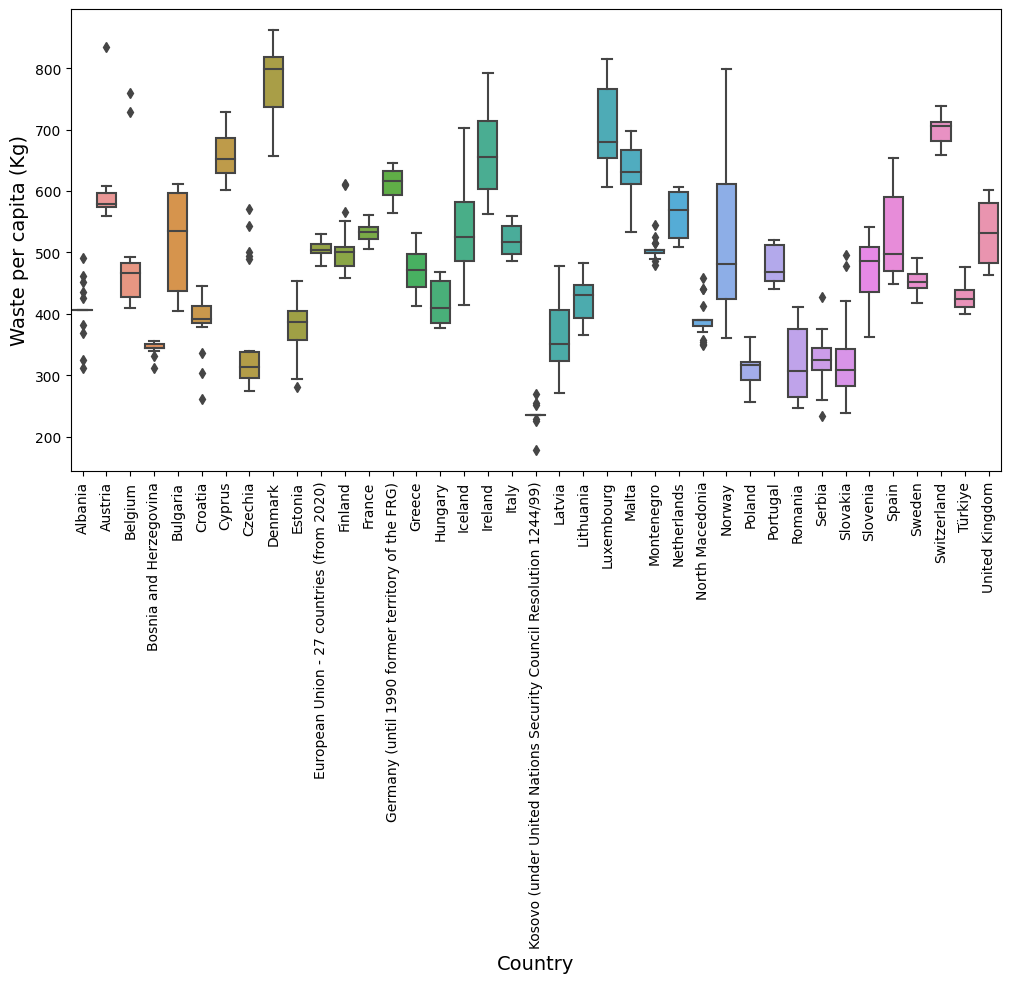

In [56]:
#BOXPLOTS for each country
# set the figure size for boxplots
fig, ax = plt.subplots(figsize=(12, 6))
# create a boxplot for each country
sns.boxplot(data=bycountry, x='country_name', y='municipal_waste_kg_per_capita', ax=ax)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Waste per capita (Kg)', fontsize=14)

# rotate x-axis labels
plt.xticks(rotation=90)

plt.show()